In [ ]:
pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install setfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 

In [ ]:
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer

In [ ]:
import os
import shutil
import json
import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from nltk.tokenize import TweetTokenizer
from datasets import load_dataset

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = "/content/drive/MyDrive/ALC/train_text.json"
labels_path = "/content/drive/MyDrive/ALC/train_truth.json"

In [ ]:
# Load the data from the JSON file
with open(train_path, "r") as f:
  data = [json.loads(line.strip()) for line in f.readlines()]


with open(labels_path, "r") as f:
  data_labels = [json.loads(line.strip()) for line in f.readlines()]


In [ ]:
train = []
for author in data:
  muestra = []
  for tweet in author['texts']:
    muestra.append(tweet['text'])
  train.append(muestra)

labels = [author['class'] for author in data_labels]

In [ ]:
class_names = ['no influencer','nano','micro','macro','mega']
label_map = {label: i for i, label in enumerate(class_names)}
inv_label_map = {v: k for k, v in label_map.items()}
labels = np.array([label_map[label] for label in labels])

In [ ]:
labels_tensor = torch.tensor(labels)
labels = torch.nn.functional.one_hot(labels_tensor)

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(train, labels,stratify = labels, test_size=0.1)

In [ ]:
def tokenize_twitter(data):
  tokenizer=TweetTokenizer(preserve_case = False,reduce_len = False)
  tok_tweets = []

  for user in data:
    n_tw = []
    for tweet in user:
      n_tw.append(' '.join(tokenizer.tokenize(tweet)))
    tok_tweets.append(' '.join(n_tw))
  return tok_tweets

In [ ]:
X_train=tokenize_twitter(X_train)
X_eval =tokenize_twitter(X_eval)

In [ ]:
print(X_train)
print(y_train)

['rt @g_rail_flexgang : @smokedoutluger facts tho lex changed the whole sound of rap with @wakaflocka 💯 💯 💯 any habit which causes one to procrastinate — to put off reaching a definite decision — leads to the habit of drifting . 🔥 💯 https://t.co/8EgKmqDvYk we got him out ! ! ! #danielkaluuya #london 🇬🇧 🇬🇧 🇬🇧 🇬🇧 🇬🇧 🔥 🔥 🔥 #blackpanther 💨 💨 💨 tonite was insane ! ! @djwhookid 💨 💨 💨 https://t.co/X8jGgpfUR6 rt @deniromyers : @onsmash_updates @wakaflocka this new waka is 🔥 🔥 🔥 rt @whattheflockas : the pain runs deep 💔 🔥 💕 #wakaandtammy #whatheflocka #wetv #tammyriveramalphurs #charlieriveramalphurs #tiktokviral #wtf … rt @feedshiphop : waka flocka returns with “ trap my ass off ” - waka flocka has been relatively quiet throughout 2017 . it ’ s unfort ... https :/ …', 'rt @justinbennettfx : $ ada from trend line to trend line . if $ 2 breaks , the market likely revisits the confluence of support at $ 1 . bear … rt @hodlerultrapmax : @mk30954594 i see a potential elliot wave pattern in majority

In [ ]:
print(X_eval)
print(y_eval)

[". @catsynthspace collab now live on @opensea :D https://t.co/Vs0aKkZXy0 https://t.co/w2Jr5nvXD2 hey cancun ! seeya on dec 16,17+ 18 with some friends :D tix on sale 8/ 30 @ 10am pst at https://t.co/Sgh1Wqatc1 #wearefriend5xi #wearefriend5tour #wearefriend5cancun https://t.co/EUYtfwUAdE good times at @e3expo with @realsubnation and @vw , if you didn ’ t get after party tickets stream it here from 6pm - 12am pst https://.live.e3expo.com #subnation2018 thank you horde ! sold out las vegas last night w / 10k strong :D https://t.co/qgHxcvkkQ3 https://t.co/vEX9rYHzXQ @37islington do they really ? @lilyachty i'm good . thanks . hmmmm ... nye on the west coast ? ! https://t.co/L7dG6ilLFD", '13 / step 5️⃣ : that ’ s it ! your $ luna airdrop will be sent and vested at the new terra wallet address provided in step 3 . terra\'s market module stats courtesy of @flipsidecrypto are now available in the link below . give it some time to catch up and reflect today\'s activity . https://t.co/HgxkHfmbO

In [ ]:
num_classes = 5

# Convert the list of tensors into a 2D numpy array
labels_array = np.array([label.numpy() for label in y_train])

# Sum the elements of each column to get the number of samples per class
num_samples_per_class = np.sum(labels_array, axis=0)

# Convert the result to a list
num_samples_per_class_list = num_samples_per_class.tolist()

# Check that the number of classes is equal to the length of the list
assert len(num_samples_per_class_list) == num_classes

print(num_samples_per_class_list)

[29, 28, 29, 29, 29]


In [ ]:
from datasets import DatasetDict, Dataset

data_dict = {
    "idx": range(len(X_train)),
    "sentence": X_train,
    "label": y_train
}

train_dataset = Dataset.from_dict(data_dict)

data_dict = {
    "idx": range(len(X_eval)),
    "sentence": X_eval,
    "label": y_eval
}

eval_dataset = Dataset.from_dict(data_dict)

dataset_dict = DatasetDict({
    "train": train_dataset,
    "eval": eval_dataset
})

In [ ]:
train_dataset = dataset_dict['train']
eval_dataset = dataset_dict['eval']

In [ ]:
train_dataset

Dataset({
    features: ['idx', 'sentence', 'label'],
    num_rows: 144
})

In [ ]:
model_id= "sentence-transformers/all-mpnet-base-v2"
model= SetFitModel.from_pretrained(model_id, multi_target_strategy="one-vs-rest")

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
trainer = SetFitTrainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    loss_class=CosineSimilarityLoss,
    batch_size = 8,
    metric="f1",
    metric_kwargs={"average": "macro"},
    num_iterations=20,
    num_epochs=1,
    column_mapping={"sentence": "text", "label": "label"}
)

In [ ]:
trainer.train()

Applying column mapping to training dataset


Generating Training Pairs:   0%|          | 0/20 [00:00<?, ?it/s]

***** Running training *****
  Num examples = 5760
  Num epochs = 1
  Total optimization steps = 720
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/720 [00:00<?, ?it/s]

In [ ]:
trainer.evaluate()

Applying column mapping to evaluation dataset
***** Running evaluation *****


{'f1': 0.5}

In [ ]:
from sentence_transformers import SentenceTransformer
model._save_pretrained("/content/drive/MyDrive/ALC/model/")

In [ ]:
saved_model = SetFitModel._from_pretrained("/content/drive/MyDrive/ALC/model")

In [ ]:
train_embed=[]
for author in X_train:
  user_embed=saved_model.model_body.encode(author, convert_to_numpy=True)
  train_embed.append(user_embed)

In [ ]:
eval_embed=[]
for author in X_eval:
  user_preds=saved_model.model_body.encode(author, convert_to_numpy=True)
  eval_embed.append(user_preds)

In [ ]:
numpy_labels = [tensor.numpy() for tensor in y_train]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(train_embed, numpy_labels)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
preds=[]
preds = knn.predict(eval_embed)

In [ ]:
preds

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]])

In [ ]:
final_pred = np.argmax(preds, axis=1).tolist()

In [ ]:
final_pred

[4, 2, 2, 1, 3, 1, 1, 3, 0, 3, 2, 3, 3, 1, 2, 2]

In [ ]:
labels_int = np.argmax(y_eval, axis=1).numpy().tolist()
labels_int

[4, 4, 1, 1, 3, 1, 1, 3, 2, 0, 2, 3, 4, 0, 0, 2]

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(labels_int, final_pred, average='macro')
f1

0.5

[4, 2, 1, 1, 1, 4, 0, 1, 4, 0, 3, 2, 1, 4, 2, 2, 3, 4, 3, 0, 2, 2, 2, 4, 1, 3, 1, 3, 1, 3, 0, 2, 1, 4, 2, 4, 2, 1, 1, 0, 4, 4, 1, 0, 4, 1, 4, 4, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 1, 1, 0, 3, 0, 2, 4, 1, 3, 4, 4, 2, 0, 3, 3, 4, 0, 4, 4, 2, 4, 3, 2, 1, 0, 1, 2, 3, 0, 1, 4, 2, 3, 1, 4, 0, 0, 4, 0, 3, 2, 1, 3, 4, 4, 1, 0, 3, 0, 2, 2, 1, 3, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 4, 0, 2, 2, 4, 3, 3, 2, 4, 3, 4, 2, 0, 3, 3, 0, 3, 2, 3, 0, 3]
{0, 1, 2, 3, 4}


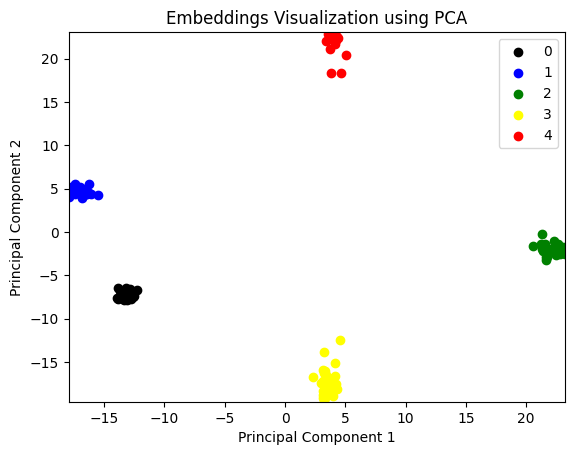

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'embeddings' is the list of embeddings
# Assuming 'labels' is the list of corresponding labels

# Standardize the embeddings
embeddings_standardized = (train_embed - np.mean(train_embed, axis=0)) / np.std(train_embed, axis=0)

# Apply PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_standardized)
y_train_np = [tensor.numpy().tolist() for tensor in y_train]
y_train_np = np.argmax(y_train_np, axis=1).tolist()
print(y_train_np)
# Plot the embeddings with colors based on labels
unique_labels = set(y_train_np)
print(unique_labels)
label_colors = ['black', 'blue', 'green', 'yellow','red']  # Define colors for each unique label
n=0
for label, color in zip(unique_labels, label_colors):
    n+=1
    indices = [i for i, l in enumerate(y_train_np) if l == label]
    plt.scatter(embeddings_pca[indices, 0], embeddings_pca[indices, 1], c=color, label=label)
    if n > 20:
      break

plt.xlim(embeddings_pca[:, 0].min(), embeddings_pca[:, 0].max())
plt.ylim(embeddings_pca[:, 1].min(), embeddings_pca[:, 1].max())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Embeddings Visualization using PCA')
plt.legend()
plt.show()

[4, 4, 1, 1, 3, 1, 1, 3, 2, 0, 2, 3, 4, 0, 0, 2]
{0, 1, 2, 3, 4}


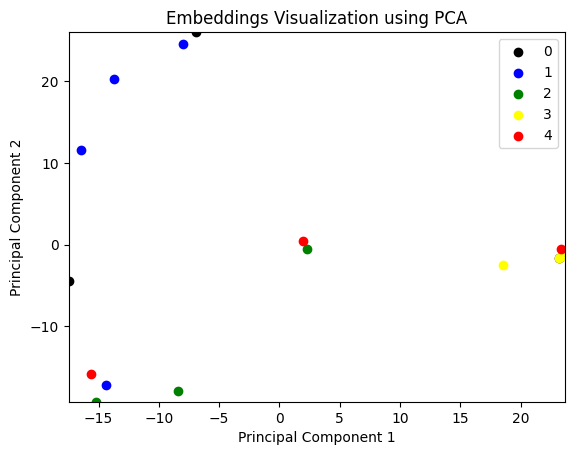

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'embeddings' is the list of embeddings
# Assuming 'labels' is the list of corresponding labels

# Standardize the embeddings
embeddings_standardized = (eval_embed - np.mean(eval_embed, axis=0)) / np.std(eval_embed, axis=0)

# Apply PCA
pca = PCA(n_components=2)
embeddings_pca = pca.fit_transform(embeddings_standardized)
y_eval_np = [tensor.numpy().tolist() for tensor in y_eval]
y_eval_np = np.argmax(y_eval_np, axis=1).tolist()
print(y_eval_np)
# Plot the embeddings with colors based on labels
unique_labels = set(y_eval_np)
print(unique_labels)
label_colors = ['black', 'blue', 'green', 'yellow','red']  # Define colors for each unique label
n=0
for label, color in zip(unique_labels, label_colors):
    n+=1
    indices = [i for i, l in enumerate(y_eval_np) if l == label]
    plt.scatter(embeddings_pca[indices, 0], embeddings_pca[indices, 1], c=color, label=label)
    if n > 20:
      break

plt.xlim(embeddings_pca[:, 0].min(), embeddings_pca[:, 0].max())
plt.ylim(embeddings_pca[:, 1].min(), embeddings_pca[:, 1].max())
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Embeddings Visualization using PCA')
plt.legend()
plt.show()

In [ ]:
preds=[]
preds=saved_model(X_eval)

In [ ]:
final_pred=[]
final_pred = np.argmax(preds, axis=1).tolist()

In [ ]:
final_pred

[2, 0, 2, 1, 3, 3, 1, 2, 4, 2, 3, 2, 0, 4, 4, 0]

In [ ]:
labels_int = np.argmax(y_eval, axis=1).numpy().tolist()
labels_int

[2, 0, 1, 1, 1, 3, 1, 0, 3, 2, 3, 4, 2, 4, 4, 0]

In [ ]:
f1 = f1_score(labels_int, final_pred, average='macro')
f1

0.6333333333333333